## Sales Prediction

In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from IPython.display import Image
from pandas_summary import DataFrameSummary

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import scale
# from sklearn.model_selection import GridSearchCV


#from sklearn.metrics import confusion_matrix



In [82]:
df = pd.read_csv('superstore/final_data.csv')

In [83]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Ship Status,Customer ID,Customer Name,Segment,...,Quantity,Discount,Profit,Sales Forecast,Sales Target,Price,Profit Ratio,Sales Target Status,forecast_bias,Sales Forecast Status
0,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,4,6,Shipped Early,DP-13000,Darren Powers,Consumer,...,2,20.0,6.0,25.0,15,8.00,37.50,Target Achieved,9.0,Over Forecast
1,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,3,20.0,4.0,18.0,300,4.00,33.33,Target Not Achieved,6.0,Over Forecast
2,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,3,20.0,-65.0,408.0,300,91.00,-23.81,Target Not Achieved,135.0,Over Forecast
3,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,...,2,80.0,-5.0,5.0,300,2.00,-125.00,Target Not Achieved,1.0,Over Forecast
4,CA-2017-141817,2017-01-05,2017-01-12,Standard Class,7,6,Shipped Late,MB-18085,Mick Brown,Consumer,...,3,20.0,5.0,29.0,21,6.67,25.00,Target Not Achieved,9.0,Over Forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,4,6,Shipped Early,JM-15580,Jill Matthias,Consumer,...,3,20.0,-1.0,5.0,61,1.00,-33.33,Target Not Achieved,2.0,Over Forecast
9982,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,4,6,Shipped Early,PO-18865,Patrick O'Donnell,Consumer,...,3,20.0,20.0,79.0,61,17.67,37.74,Target Not Achieved,26.0,Over Forecast
9983,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,4,6,Shipped Early,PO-18865,Patrick O'Donnell,Consumer,...,7,0.0,3.0,136.0,80,13.00,3.30,Target Achieved,45.0,Over Forecast
9984,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,4,6,Shipped Early,EB-13975,Erica Bern,Corporate,...,2,20.0,5.0,21.0,29,7.00,35.71,Target Not Achieved,7.0,Over Forecast


In [84]:
df[["year", "month", "day"]] = df["Order Date"].str.split("-", expand = True)

In [85]:
df['month'].head()

0    01
1    01
2    01
3    01
4    01
Name: month, dtype: object

In [86]:
df.drop(['year', 'day', 'Sales Forecast Status', 'Sales Target Status', 'Sales Target'], axis = 1, inplace=True)


In [87]:
df.drop(['Ship Date', 'Ship Mode','Days to Ship Actual','Days to Ship Scheduled', 'Ship Status', 'Customer ID','Customer Name', 'forecast_bias', 'Sales Forecast', 'Country/Region', 'City', 'State', 'Region'], axis = 1, inplace=True)


In [88]:
df.columns

Index(['Order ID', 'Order Date', 'Segment', 'Postal Code', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Price', 'Profit Ratio', 'month'],
      dtype='object')

## Data Analysis

In [89]:
data_summary = DataFrameSummary(df)
data_summary.columns_stats.T

,counts,uniques,missing,missing_perc,types
Order ID,9986,5009,0,0%,categorical
Order Date,9986,1236,0,0%,categorical
Segment,9986,3,0,0%,categorical
Postal Code,9986,631,0,0%,numeric
Product ID,9986,1862,0,0%,categorical
Category,9986,3,0,0%,categorical
Sub-Category,9986,17,0,0%,categorical
Product Name,9986,1849,0,0%,categorical
Sales,9986,1148,0,0%,numeric
Quantity,9986,14,0,0%,numeric


In [90]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9986 non-null   object 
 1   Order Date    9986 non-null   object 
 2   Segment       9986 non-null   object 
 3   Postal Code   9986 non-null   float64
 4   Product ID    9986 non-null   object 
 5   Category      9986 non-null   object 
 6   Sub-Category  9986 non-null   object 
 7   Product Name  9986 non-null   object 
 8   Sales         9986 non-null   float64
 9   Quantity      9986 non-null   int64  
 10  Discount      9986 non-null   float64
 11  Profit        9986 non-null   float64
 12  Price         9986 non-null   float64
 13  Profit Ratio  9986 non-null   float64
 14  month         9986 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.1+ MB


(9986, 15)

In [91]:
df.isnull().sum()

Order ID        0
Order Date      0
Segment         0
Postal Code     0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Price           0
Profit Ratio    0
month           0
dtype: int64

#### Graficos

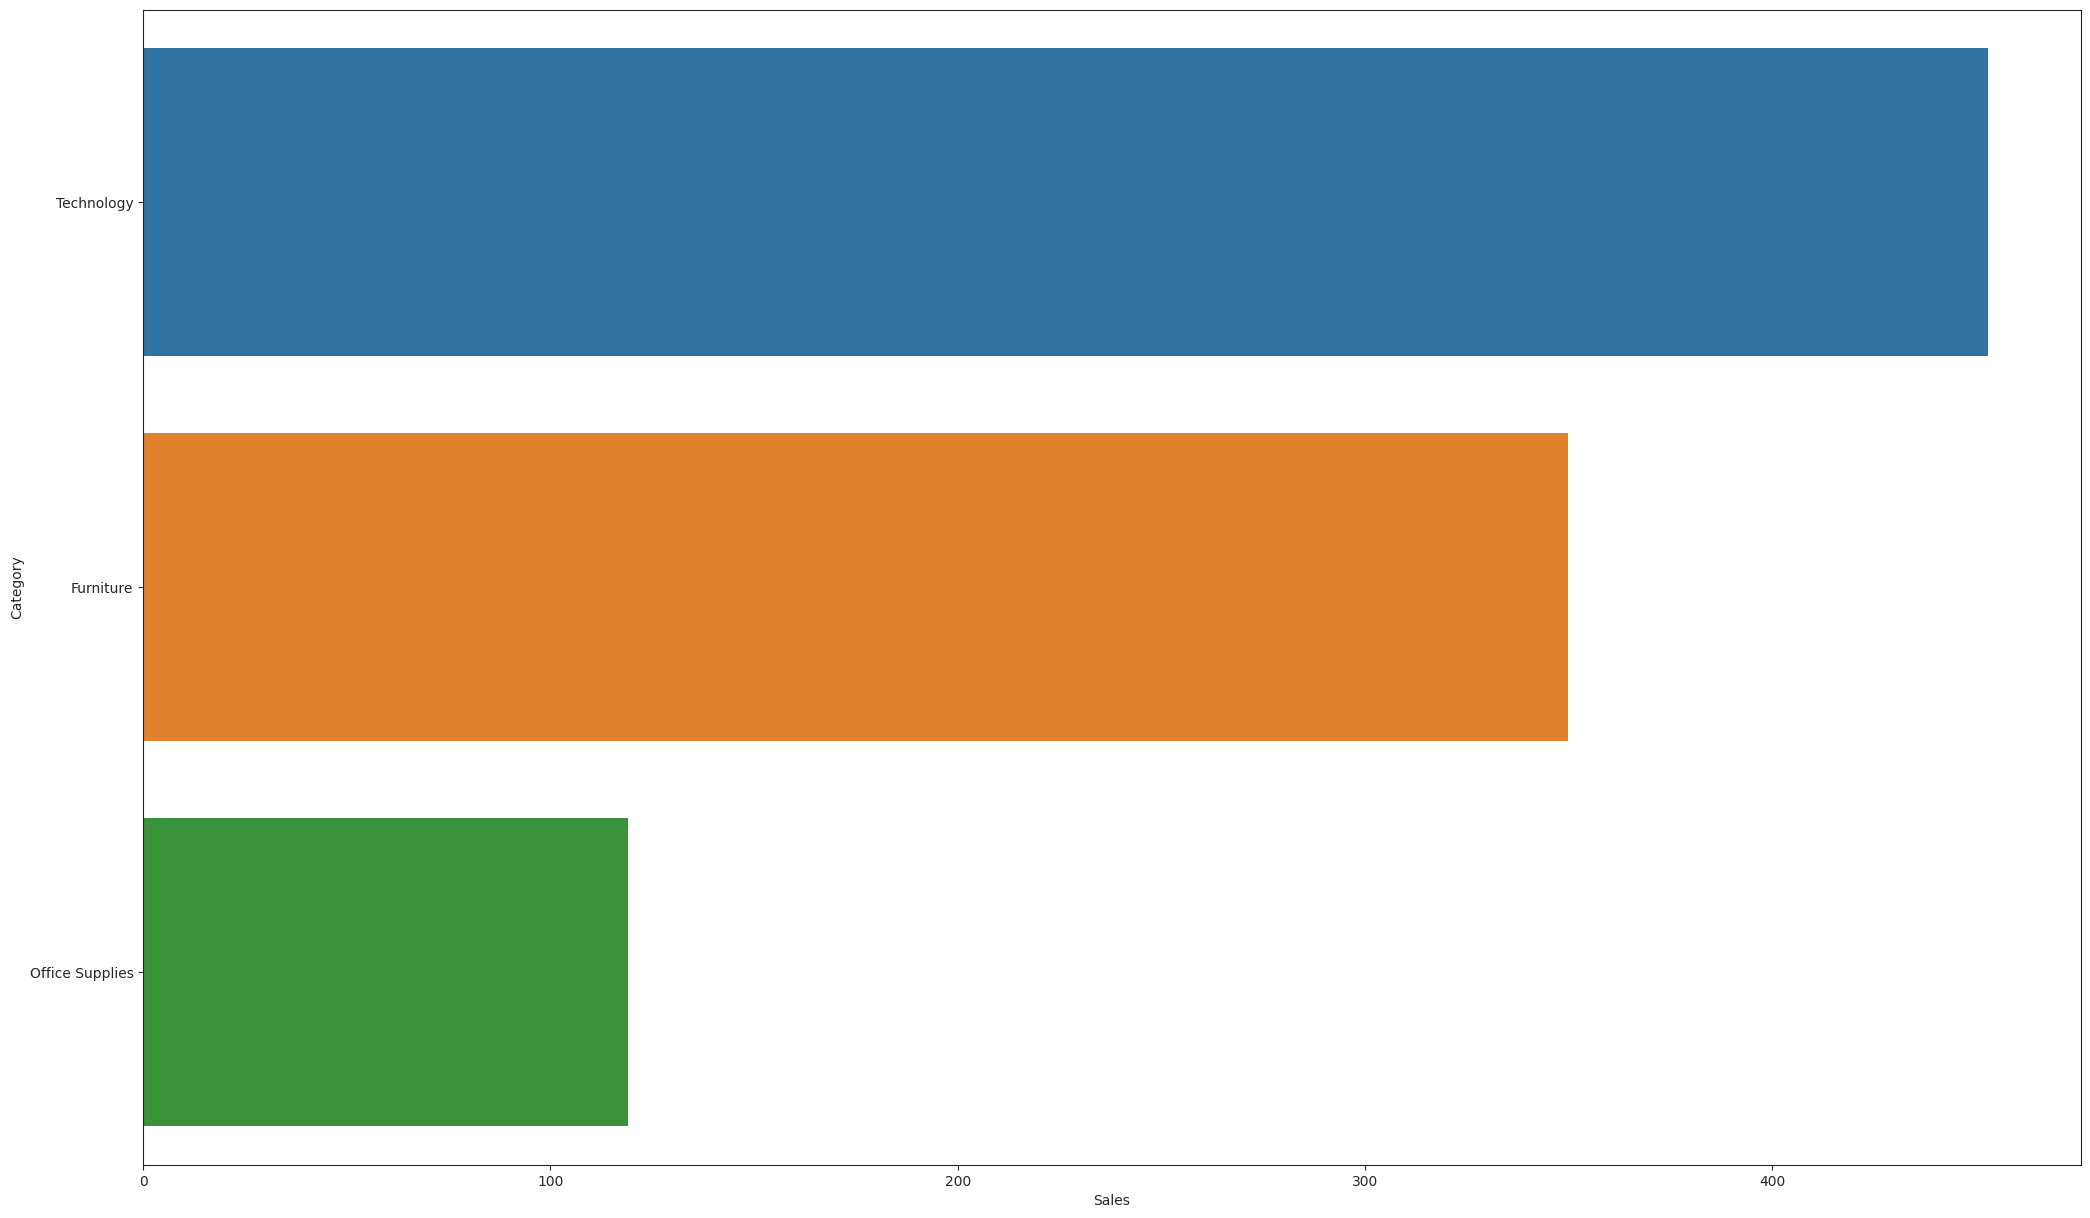

In [92]:
d=df.groupby('Category')['Sales'].mean().sort_values(ascending=False)
d=pd.DataFrame(d)
df.Sales= pd.to_numeric(df.Sales, errors='coerce')
ax,f=plt.subplots(figsize=(25,15))
plt.style.use('default')
sns.barplot(x='Sales',y=d.index,data=d,ax=None,ci=None);

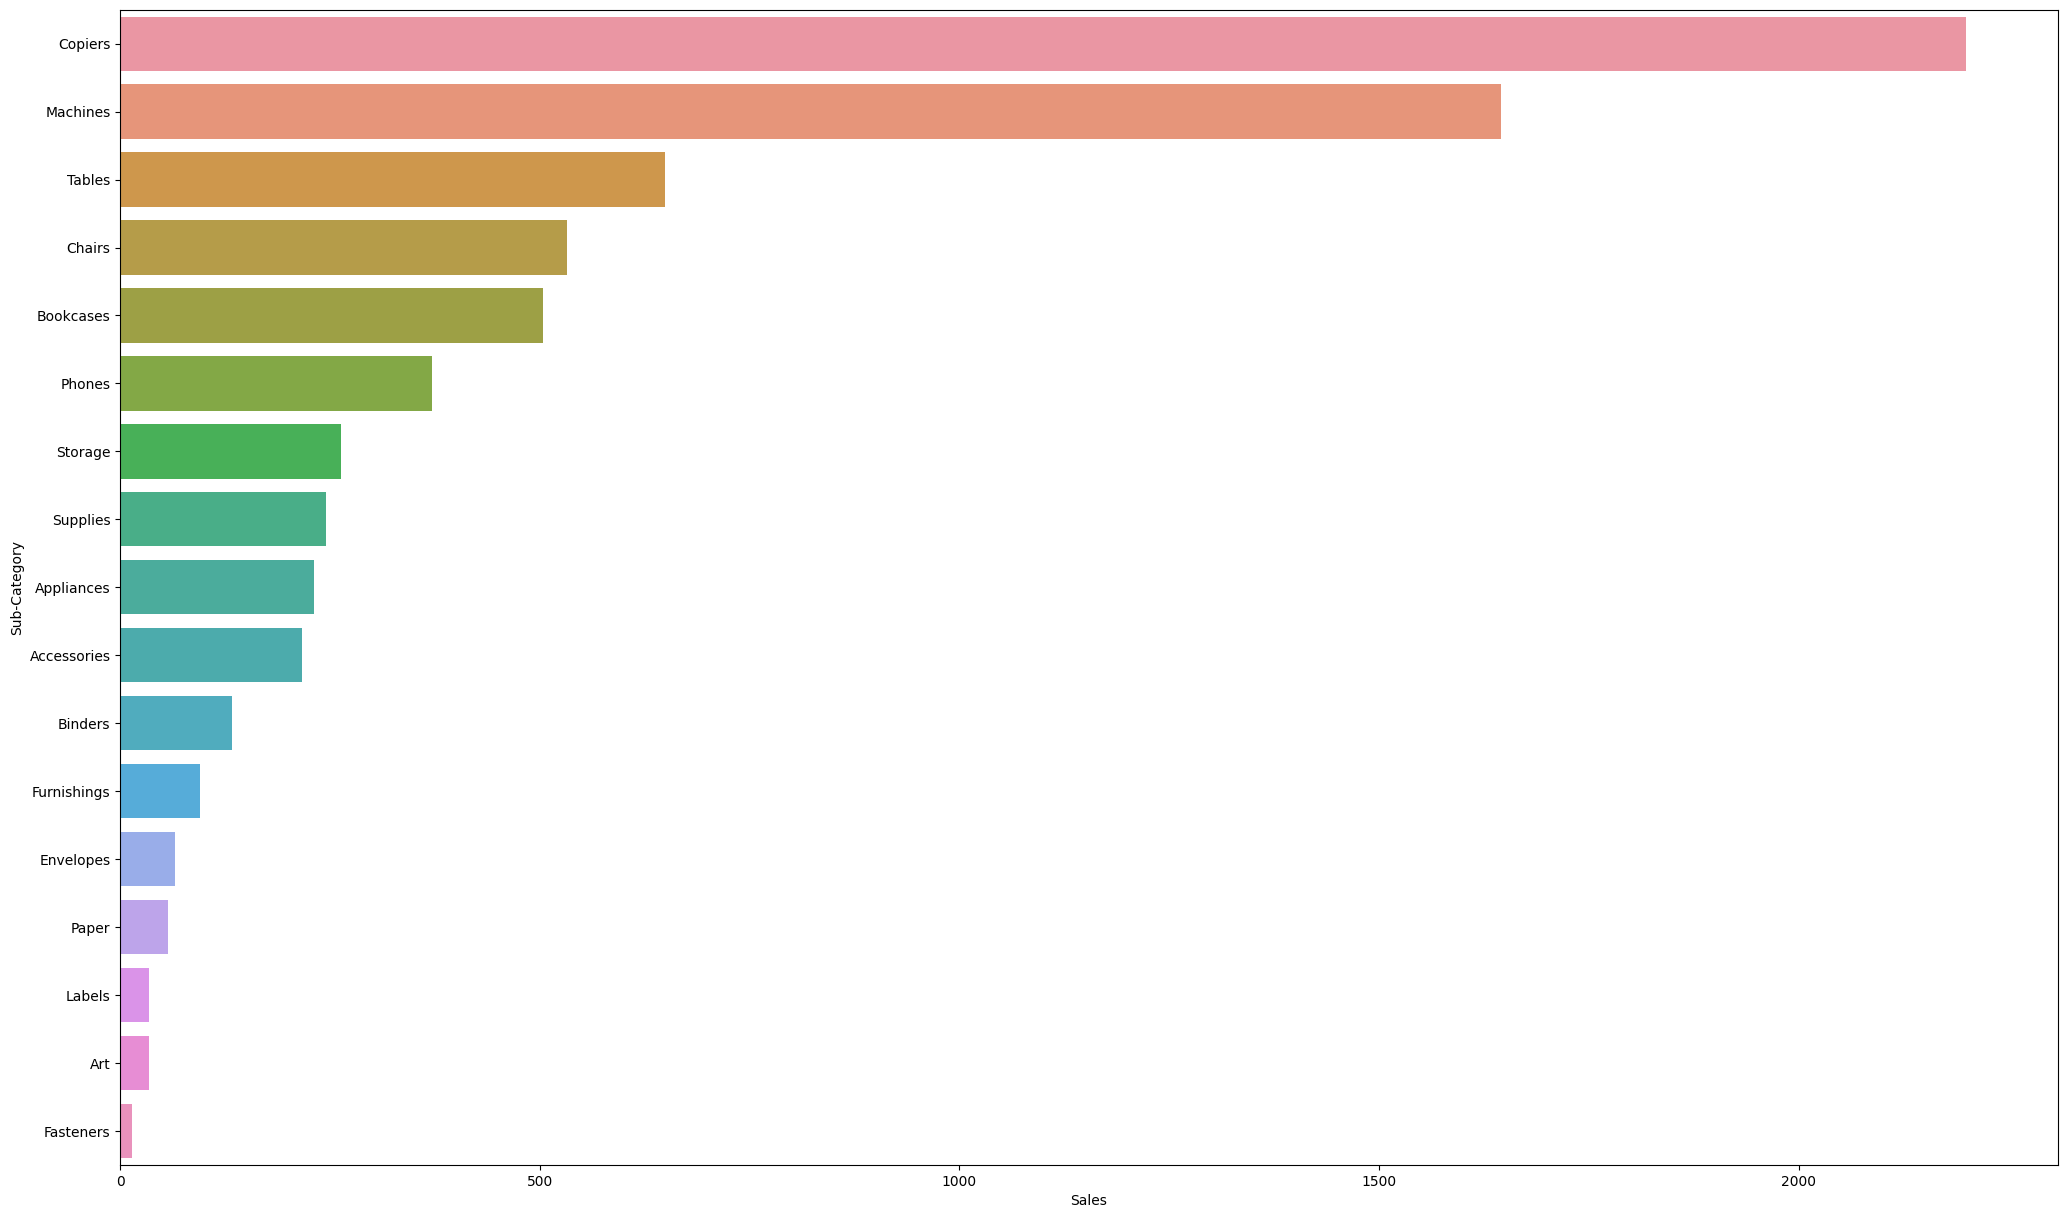

In [93]:
w=df.groupby('Sub-Category')['Sales'].mean().sort_values(ascending=False)
w=pd.DataFrame(w)
df.Sales= pd.to_numeric(df.Sales, errors='coerce')
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(x='Sales',y=w.index,data=w,ax=None,ci=None);

In [94]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

#### Identificar ventas por mes

In [95]:
df['month'].value_counts()

11    1470
12    1406
09    1382
10     819
05     735
06     717
07     709
08     706
03     695
04     666
01     381
02     300
Name: month, dtype: int64

In [96]:
df['month'] = df['month'].astype(int)

In [97]:
jan = df[df.month == 1]
feb = df[df.month == 2]
mar = df[df.month == 3]
apr = df[df.month == 4]
may = df[df.month == 5]
jun = df[df.month == 6]
jul = df[df.month == 7]
aug = df[df.month == 8]
sep = df[df.month == 9]
oct = df[df.month == 10]
nov = df[df.month == 11]
dec = df[df.month == 12]

In [98]:
sum_jan = jan['Sales'].sum()
sum_feb = feb['Sales'].sum()
sum_mar = mar['Sales'].sum()
sum_apr = apr['Sales'].sum()
sum_may = may['Sales'].sum()
sum_jun = jun['Sales'].sum()
sum_jul = jul['Sales'].sum()
sum_aug = aug['Sales'].sum()
sum_sep = sep['Sales'].sum()
sum_oct = oct['Sales'].sum()
sum_nov = nov['Sales'].sum()
sum_dec = dec['Sales'].sum()

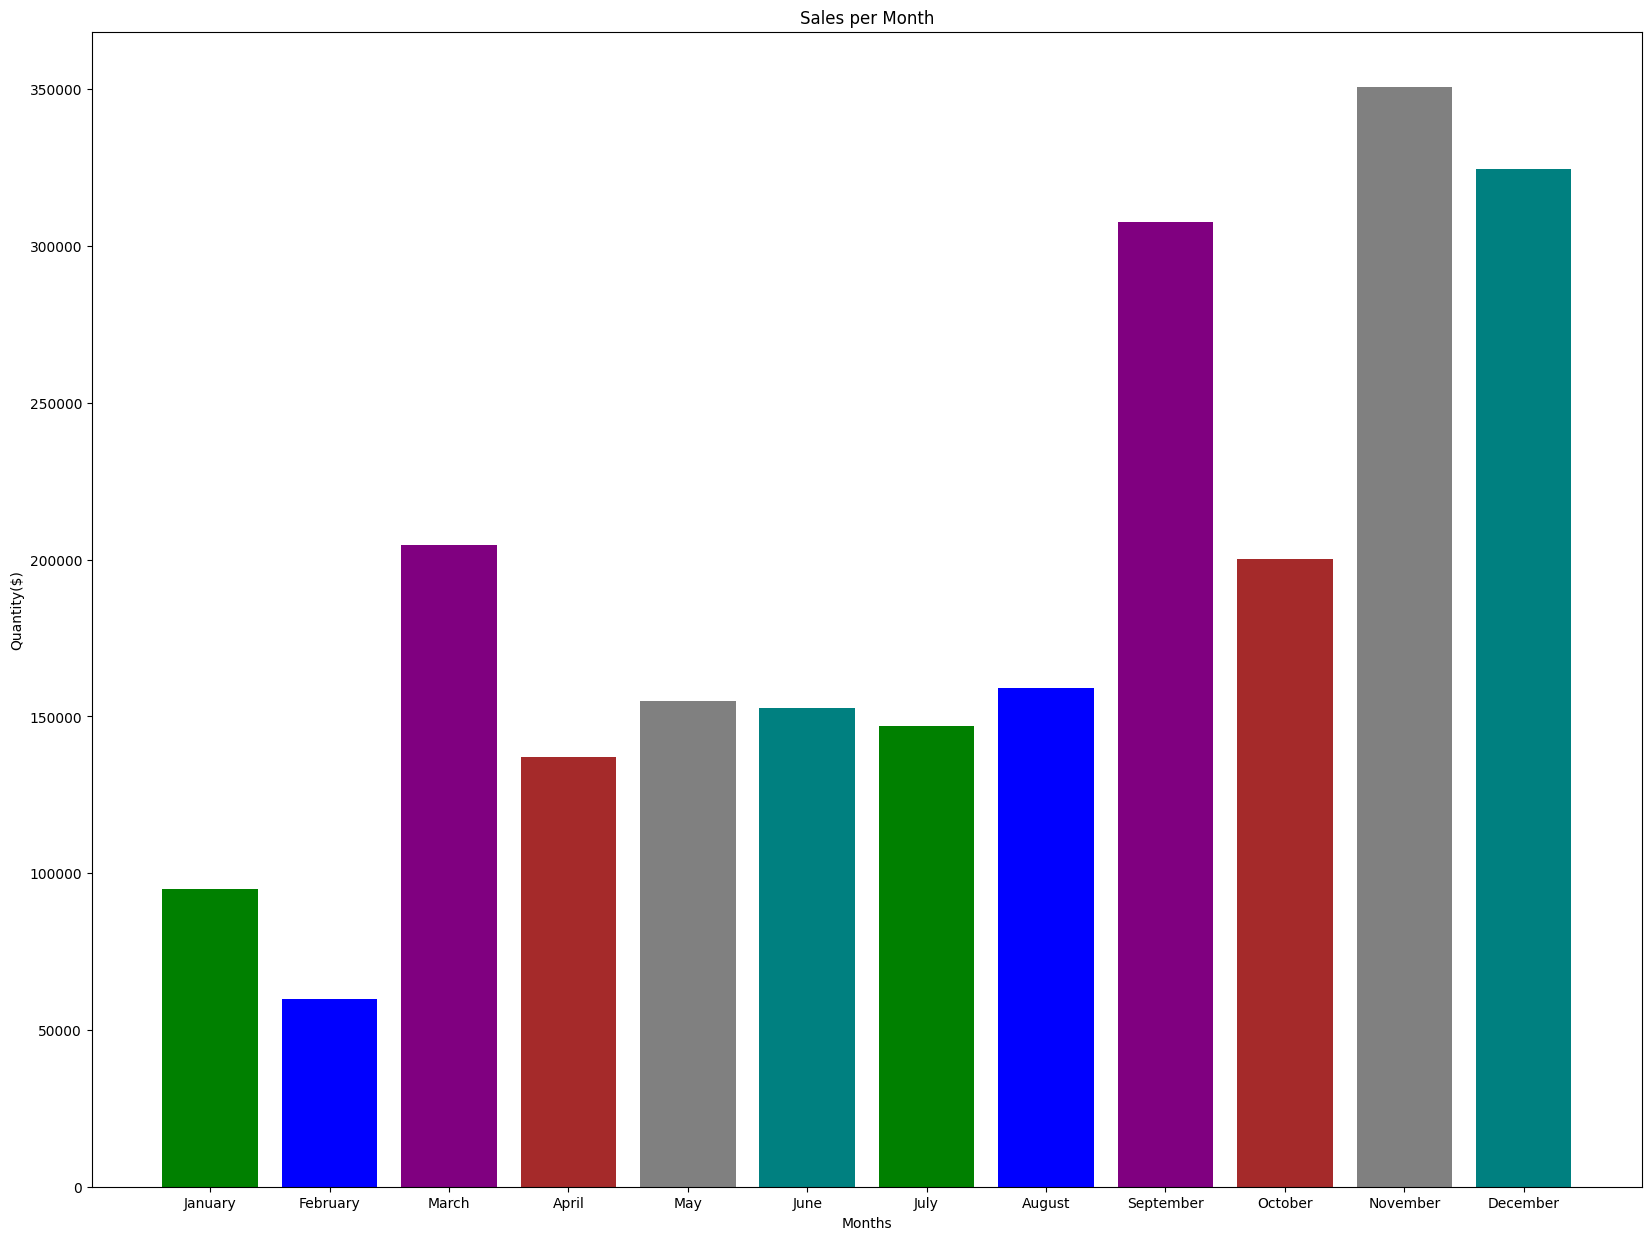

In [99]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sum = [sum_jan, sum_feb, sum_mar, sum_apr, sum_may, sum_jun, sum_jul, sum_aug, sum_sep, sum_oct, sum_nov, sum_dec]

plt.figure(figsize=(20,15))
New_Colors = ['green','blue','purple','brown','grey','teal']
plt.style.use('default')
plt.bar(months,sum, color=New_Colors)
plt.title('Sales per Month')
plt.xlabel('Months')
plt.ylabel('Quantity($)')
plt.show()

## Pairplot

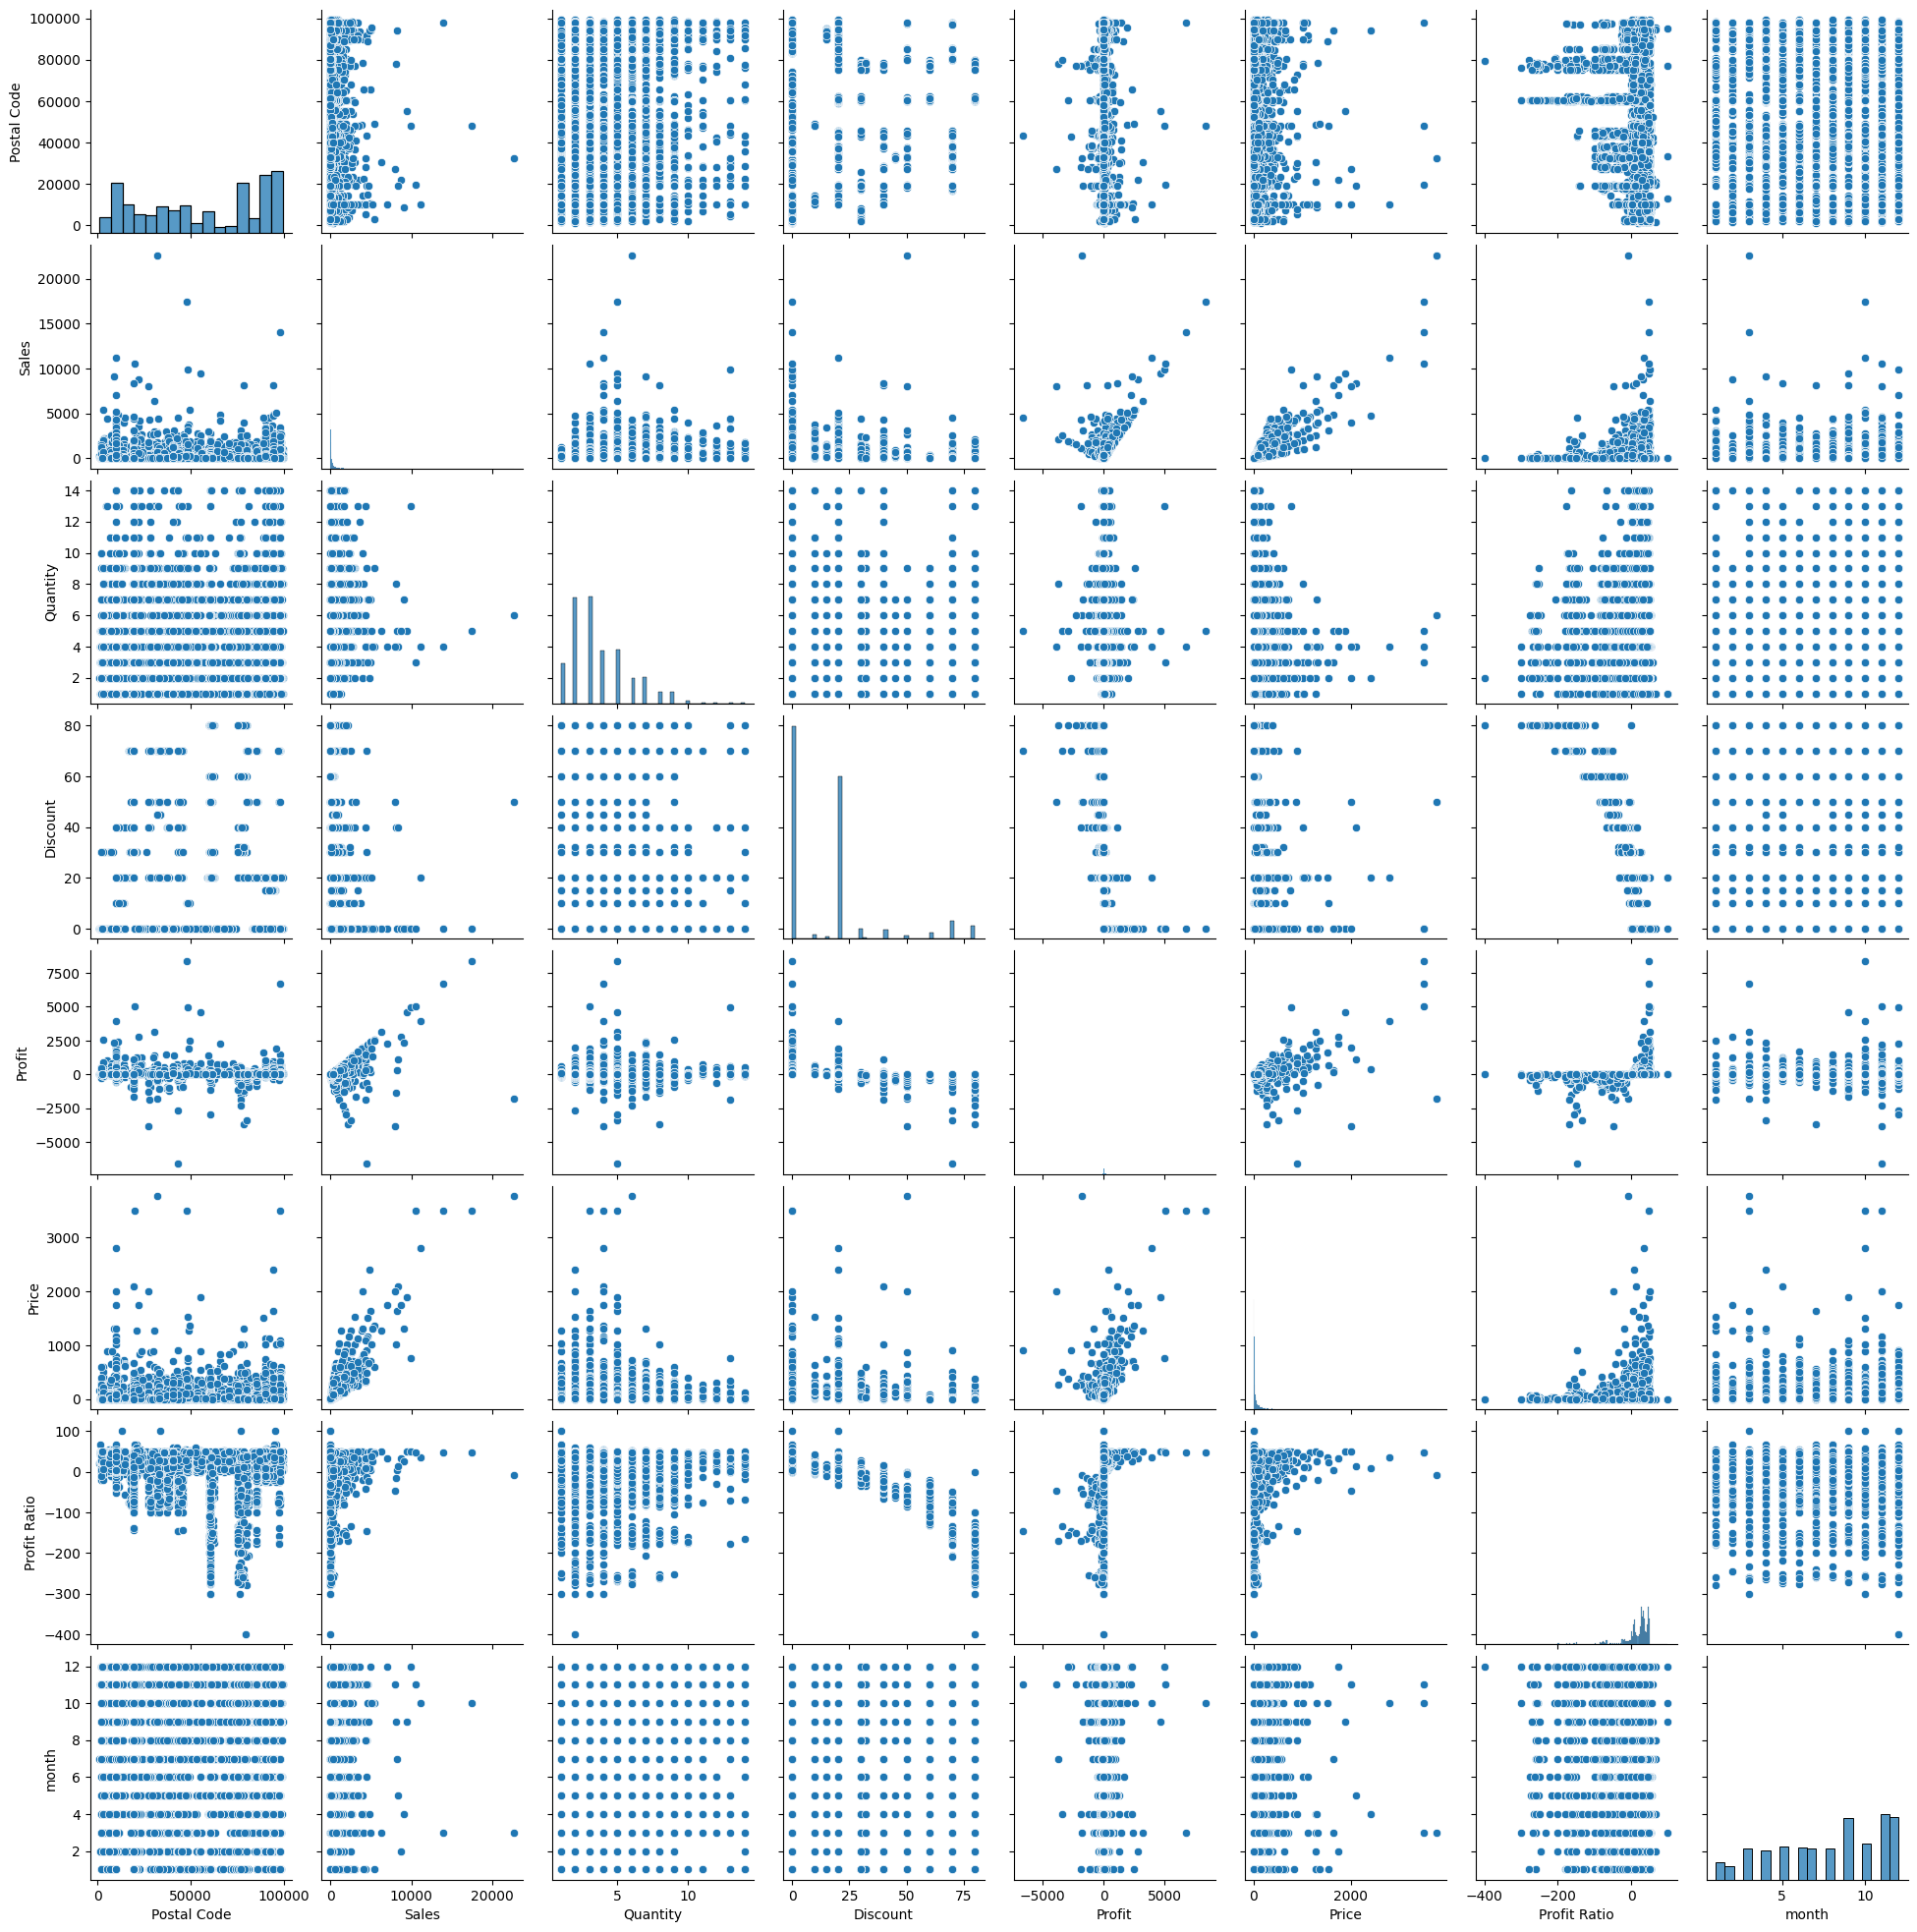

In [100]:
sns.pairplot(df);

#### Cambiar strings por numeros

Columna 'Segment'

In [101]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [102]:
my_dict = {"Consumer":0,
            "Home Office":1,
            "Corporate":2}

In [103]:
df['Segment'] = df['Segment'].map(my_dict)

Category

In [104]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [105]:
my_dict2 = {"Office Supplies":0,
            "Furniture":1,
            "Technology":2            }

In [106]:
df['Category'] = df['Category'].map(my_dict2)

Sub-Category

In [107]:
df['Sub-Category'].unique()

array(['Paper', 'Labels', 'Storage', 'Binders', 'Art', 'Chairs', 'Phones',
       'Fasteners', 'Furnishings', 'Accessories', 'Envelopes',
       'Bookcases', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [108]:
my_dict3 = {'Paper':0, 'Labels':1, 'Storage':2, 'Binders':3, 'Art':4, 'Chairs':5, 'Phones':6,
       'Fasteners':7, 'Furnishings':8, 'Accessories':9, 'Envelopes':10,
       'Bookcases':11, 'Appliances':12, 'Tables':13, 'Supplies':14, 'Machines':15,
       'Copiers':16}   

In [109]:
df['Sub-Category'] = df['Sub-Category'].map(my_dict3)

## Correlación

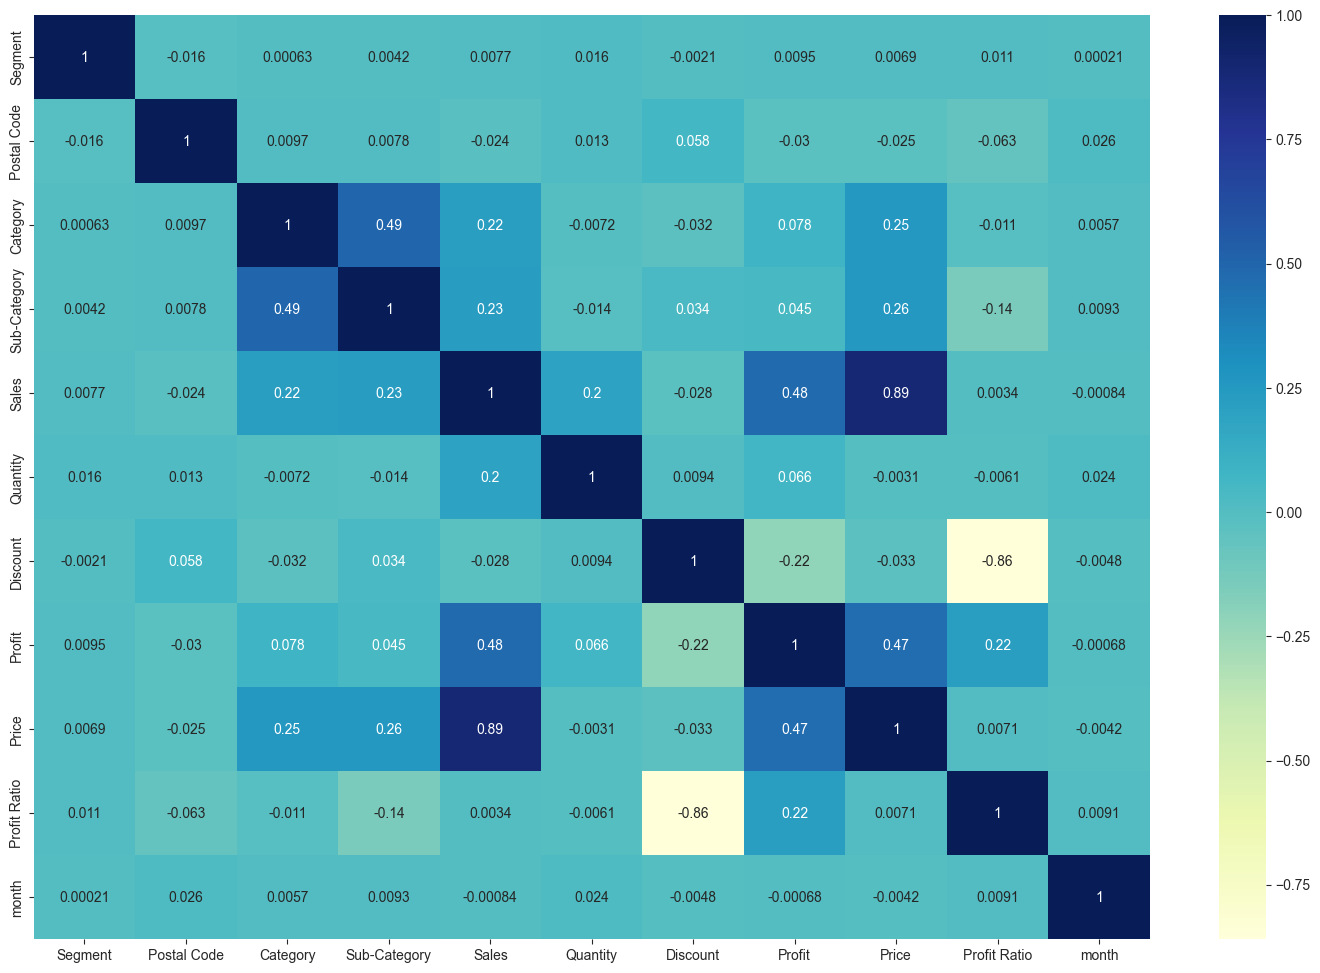

In [110]:
plt.figure(figsize=(18,12))
sns.set_style("ticks")
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu');

#### Se nota correlación entre algunas variables, que deberán ser consideradas en X. La variable "Sales Forecast" parece igual la variable "Sales" que será la Y, por lo que no ha sido incluida en X.

## Generar archivo CSV limpio

In [111]:
df.to_csv('store_cleaned.csv')


## Train / Test

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [113]:
X = df[['Price', "Profit", "Quantity", "Segment", "Category", "Sub-Category"]]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size   = 0.2,
                                        random_state = 42)

In [114]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (9986, 6)
Train features shape: (7988, 6)
Train target shape: (7988,)
Test features shape: (1998, 6)
Test target shape: (1998,)


# Modelos

### Linear Regression

In [115]:
modelo_lr = LinearRegression()


In [116]:
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [117]:
coeff_df = pd.DataFrame(modelo_lr.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Price,3.455737
Profit,0.250554
Quantity,55.707769
Segment,-2.976905
Category,3.236925
Sub-Category,2.440324


In [118]:
print("Intercept:", modelo_lr.intercept_)
print("Coeficiente de determinación R^2:", modelo_lr.score(X, y))

Intercept: -212.72041785501702
Coeficiente de determinación R^2: 0.8323831978473486


In [119]:
# pd.set_option('display.max_rows', None) 
# y.value_counts()

In [120]:
y.mean()

229.72341277788905

In [121]:
prediction = modelo_lr.predict(X_test)
prediction


array([150.42474502, 150.84755656, 302.11746492, ...,  94.60822878,
        83.06633937, 146.91461581])

In [122]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 107.82803517747833
MSE: 94963.1762225876
RMSE: 308.1609583035911


In [123]:
from sklearn.metrics import _scorer

Linear Regression Score

In [124]:
modelo_lr.score(X_test, y_test)

0.862916703787703

In [125]:
intercept = modelo_lr.intercept_
features = pd.DataFrame(modelo_lr.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
Quantity,55.707769
Price,3.455737
Category,3.236925
Profit,0.250554
Segment,-2.976905


Crear Dataframe con las métrica consideradas

In [126]:
resultados = {'LRegression': [
                    mean_absolute_error(y_test, prediction),
                    mean_squared_error(y_test, prediction),
                    np.sqrt(mean_squared_error(y_test, prediction)),
                    modelo_lr.score(X_test, y_test)
                    ]}

resultados = pd.DataFrame(resultados, index=['MAE','MSE','RMSE', 'Score'])

resultados

,LRegression
MAE,107.828035
MSE,94963.176223
RMSE,308.160958
Score,0.862917


### Ensemble Random Forest

In [127]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [128]:
# construimos el modelo
rf = RandomForestClassifier()

In [129]:
# entrenamos el modelo
rf.fit(X_train, y_train) 

RandomForestClassifier()

In [130]:
prediction_rf = rf.predict(X_test)
prediction_rf


array([105.,  49.,  28., ...,   8.,  26.,  17.])

In [131]:
print('MAE:', mean_absolute_error(y_test, prediction_rf))
print('MSE:', mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction_rf)))

MAE: 66.66466466466467
MSE: 360459.44344344345
RMSE: 600.3827474565234


RandomForestClassifier Score

In [132]:
rf.score(X_test, y_test)

0.45045045045045046

In [133]:
resultados['RForestClassifier'] = [             
    mean_absolute_error(y_test, prediction_rf),
    mean_squared_error(y_test, prediction_rf),
    np.sqrt(mean_squared_error(y_test, prediction_rf)),
    rf.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier
MAE,107.828035,66.664665
MSE,94963.176223,360459.443443
RMSE,308.160958,600.382747
Score,0.862917,0.450450


### Poly

In [134]:
from sklearn.preprocessing import PolynomialFeatures

In [135]:
# poly_feats = PolynomialFeatures(degree = 3)
# poly_feats.fit(X)
# X_poly = poly_feats.transform(X)
# X_poly

In [136]:
# X_poly.shape

In [137]:
# pol_reg = LinearRegression()
# pol_reg.fit(X_poly, y)

In [138]:
# pol_reg.coef_

In [139]:
# predictions = pol_reg.predict(X_poly)

In [140]:
# Visualizing the Polymonial Regression results
# def viz_polymonial():
#     plt.scatter(X, y, color='red')
#     plt.plot(X, predictions, color='blue')
#     plt.title('Truth or Bluff (Linear Regression)')
#     plt.xlabel('Position level')
#     plt.ylabel('Salary')
#     plt.show()
#     return
# viz_polymonial()


### Ridge

In [141]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 107.81623474930643
MSE test 94963.0442249146
RMSE test 308.1607441335035


In [142]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
alphas

array([1.00000000e-04, 1.17681195e-04, 1.38488637e-04, 1.62975083e-04,
       1.91791026e-04, 2.25701972e-04, 2.65608778e-04, 3.12571585e-04,
       3.67837977e-04, 4.32876128e-04, 5.09413801e-04, 5.99484250e-04,
       7.05480231e-04, 8.30217568e-04, 9.77009957e-04, 1.14975700e-03,
       1.35304777e-03, 1.59228279e-03, 1.87381742e-03, 2.20513074e-03,
       2.59502421e-03, 3.05385551e-03, 3.59381366e-03, 4.22924287e-03,
       4.97702356e-03, 5.85702082e-03, 6.89261210e-03, 8.11130831e-03,
       9.54548457e-03, 1.12332403e-02, 1.32194115e-02, 1.55567614e-02,
       1.83073828e-02, 2.15443469e-02, 2.53536449e-02, 2.98364724e-02,
       3.51119173e-02, 4.13201240e-02, 4.86260158e-02, 5.72236766e-02,
       6.73415066e-02, 7.92482898e-02, 9.32603347e-02, 1.09749877e-01,
       1.29154967e-01, 1.51991108e-01, 1.78864953e-01, 2.10490414e-01,
       2.47707636e-01, 2.91505306e-01, 3.43046929e-01, 4.03701726e-01,
       4.75081016e-01, 5.59081018e-01, 6.57933225e-01, 7.74263683e-01,
      

In [143]:
# n_alphas = 100
# alphas = np.logspace(-4, 5, n_alphas) 

# coef_ridge = []
# err_ridge = []
# baseline = []

# for a in alphas:
#     ridge = Ridge(alpha=a)
#     ridge.fit(X_train, y_train)
    
#     coef_ridge.append(ridge.coef_)
    
#     y_pred = ridge.predict(X_test)
#     ridge_error = mean_squared_error(y_pred, y_test)
    
#     err_ridge.append(ridge_error)
#     baseline.append(baseline_error)

In [144]:
# min(err_ridge)

NameError: name 'err_ridge' is not defined

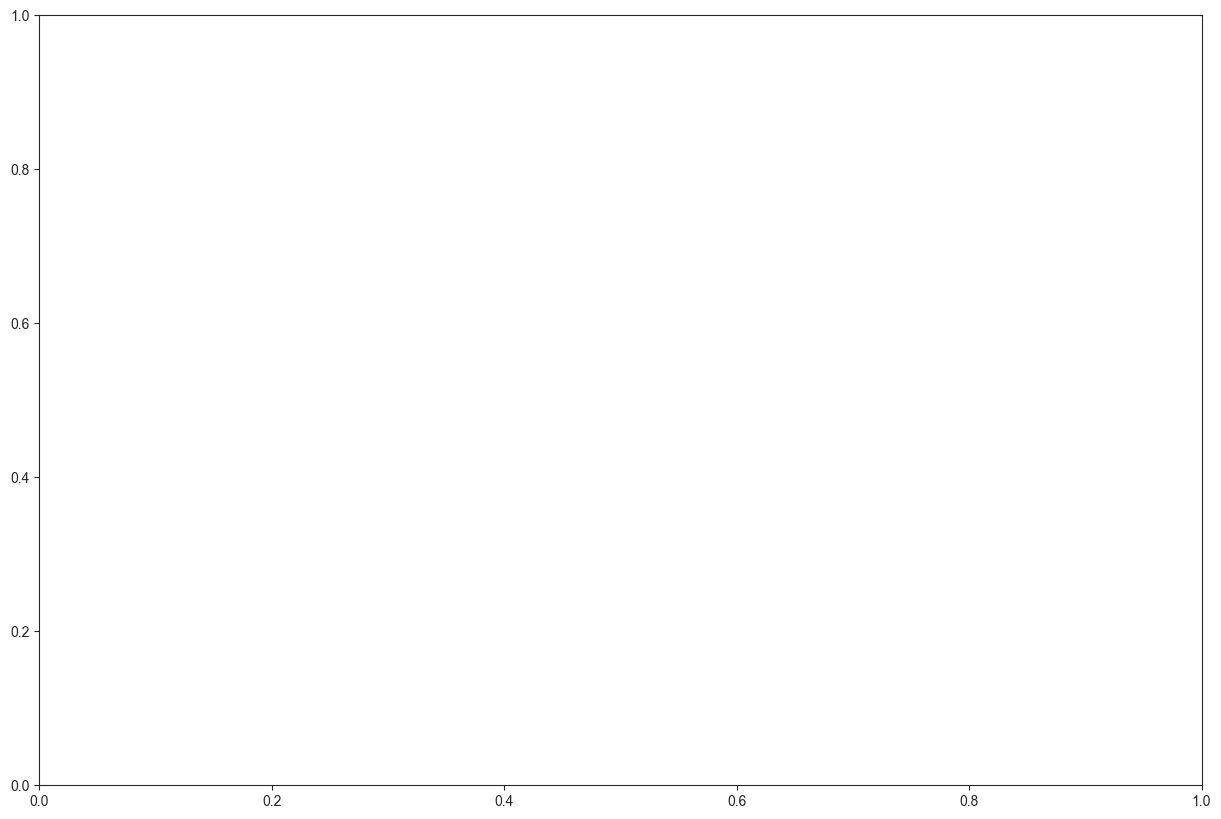

In [145]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [ ]:
ridge = Ridge(alpha=10000)
ridge.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

#mejor

MAE test 99.64586562089247
MSE test 95609.455257389
RMSE test 309.2077865406837


Ridge Score

In [ ]:
ridge.score(X_test, y_test)

0.8619837731098599

In [ ]:
resultados['Ridge'] = [             
    mean_absolute_error(y_test, ridge.predict(X_test)),
    mean_squared_error(y_test, ridge.predict(X_test)),
    np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))),
    ridge.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier,Ridge
MAE,107.828035,67.760260,99.645866
MSE,94963.176223,366466.937437,95609.455257
RMSE,308.160958,605.365127,309.207787
Score,0.862917,0.459960,0.861984


### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MAE test 107.55189584214145
MSE test 94870.33259792192
RMSE test 308.0102800198752


Lasso Score

In [ ]:
lasso.score(X_test, y_test)

0.8630507274230502

In [ ]:
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test)
    lasso_error = mean_squared_error(y_pred, y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

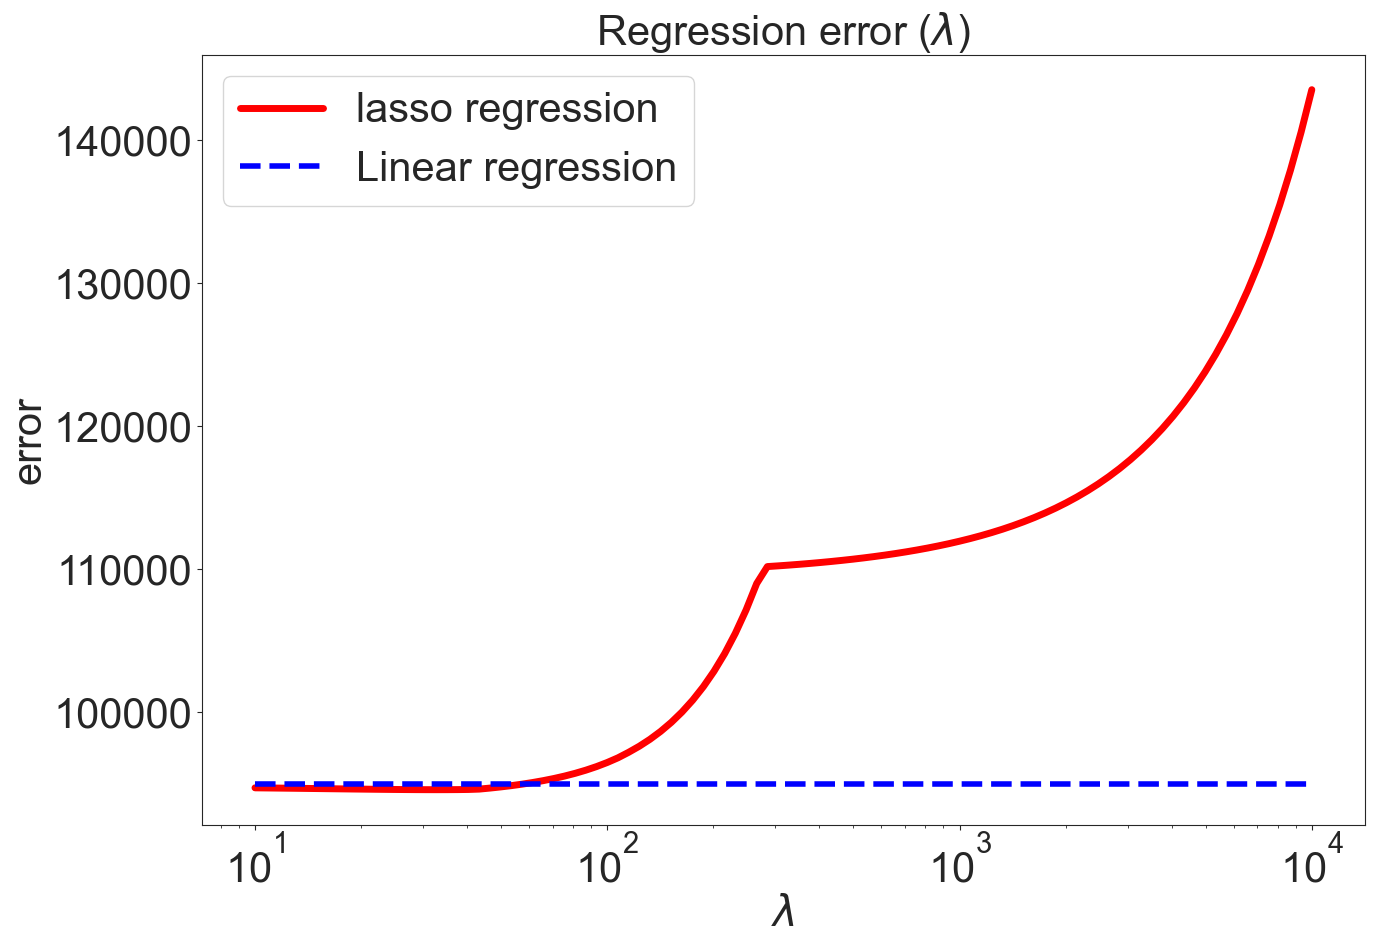

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

#peor

MAE test 94.05768926387645
MSE test 96459.38132074822
RMSE test 310.57910638152754


In [ ]:
lasso.score(X_test, y_test)

0.8607568694727181

In [ ]:
resultados['Lasso'] = [             
    mean_absolute_error(y_test, lasso.predict(X_test)),
    mean_squared_error(y_test, lasso.predict(X_test)),
    np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))),
    lasso.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier,Ridge,Lasso
MAE,107.828035,67.760260,99.645866,94.057689
MSE,94963.176223,366466.937437,95609.455257,96459.381321
RMSE,308.160958,605.365127,309.207787,310.579106
Score,0.862917,0.459960,0.861984,0.860757


### Elastic

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=10, l1_ratio=0.5)

elastic.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MAE test 90.90706031366273
MSE test 98894.04313505003
RMSE test 314.4742328634415


In [ ]:
elastic.score(X_test, y_test)

0.8572423338396175

In [ ]:
resultados['ElasticNet'] = [             
    mean_absolute_error(y_test, elastic.predict(X_test)),
    mean_squared_error(y_test, elastic.predict(X_test)),
    np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))),
    elastic.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier,Ridge,Lasso,ElasticNet
MAE,107.828035,67.760260,99.645866,94.057689,94.354221
MSE,94963.176223,366466.937437,95609.455257,96459.381321,96289.087846
RMSE,308.160958,605.365127,309.207787,310.579106,310.304831
Score,0.862917,0.459960,0.861984,0.860757,0.861003


### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet()

parameters = {'alpha': np.logspace(-3,4,50),
              'l1_ratio': np.arange(0,1,0.01)
            }

elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error')

elastic_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.38949549e-03, 1.93069773e-03, 2.68269580e-03,
       3.72759372e-03, 5.17947468e-03, 7.19685673e-03, 1.00000000e-02,
       1.38949549e-02, 1.93069773e-02, 2.68269580e-02, 3.72759372e-02,
       5.17947468e-02, 7.19685673e-02, 1.00000000e-01, 1.38949549e-01,
       1.93069773e-01, 2.68269580e-01, 3.72759372e-...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_squared_error')

In [ ]:
print('MAE test', mean_absolute_error(y_test, elastic_gs.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic_gs.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic_gs.predict(X_test))))

MAE test 105.8202677796586
MSE test 94745.18126311021
RMSE test 307.8070520035404


In [ ]:
elastic_gs.best_params_

{'alpha': 7.196856730011514, 'l1_ratio': 0.99}

In [ ]:
elastic_gs.best_estimator_

ElasticNet(alpha=7.196856730011514, l1_ratio=0.99)

In [ ]:
elastic_gs.best_score_

-60913.81620520744

In [ ]:
lasso = Lasso()

parameters = {'alpha': np.logspace(0,5,50)
            }

lasso_gs = GridSearchCV(lasso, parameters, cv=3, scoring='neg_mean_squared_error')

lasso_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+00, 1.26485522e+00, 1.59985872e+00, 2.02358965e+00,
       2.55954792e+00, 3.23745754e+00, 4.09491506e+00, 5.17947468e+00,
       6.55128557e+00, 8.28642773e+00, 1.04811313e+01, 1.32571137e+01,
       1.67683294e+01, 2.12095089e+01, 2.68269580e+01, 3.39322177e+01,
       4.29193426e+01, 5.42867544e+01, 6.86648845e+01, 8....
       7.19685673e+02, 9.10298178e+02, 1.15139540e+03, 1.45634848e+03,
       1.84206997e+03, 2.32995181e+03, 2.94705170e+03, 3.72759372e+03,
       4.71486636e+03, 5.96362332e+03, 7.54312006e+03, 9.54095476e+03,
       1.20679264e+04, 1.52641797e+04, 1.93069773e+04, 2.44205309e+04,
       3.08884360e+04, 3.90693994e+04, 4.94171336e+04, 6.25055193e+04,
       7.90604321e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_gs.best_estimator_

Lasso(alpha=6.551285568595509)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=910)
lasso.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

#peor

MAE test 103.63428451446325
MSE test 111709.86066744024
RMSE test 334.2302509759406


### SVR

In [ ]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.svm import SVR # for building the model

In [ ]:
# Feature scaling
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_train, y_train)

SVR()

In [ ]:
# Predicting a new result 
regressor.predict(X_test)

array([68.21265132, 21.7098901 , 25.80770973, ..., 15.34327053,
       24.34220752, 19.71791609])

In [ ]:
print('MAE test', mean_absolute_error(y_test, regressor.predict(X_test)))
print('MSE test', mean_squared_error(y_test, regressor.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

MAE test 131.1780286869977
MSE test 602331.6708035182
RMSE test 776.1002968711699


SVR score

In [ ]:
regressor.score(X_test, y_test)

0.13050917069929768

In [ ]:
resultados['SVRegression'] = [             
    mean_absolute_error(y_test, regressor.predict(X_test)),
    mean_squared_error(y_test, regressor.predict(X_test)),
    np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))),
    regressor.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier,Ridge,Lasso,ElasticNet,SVRegression
MAE,107.828035,67.760260,99.645866,94.057689,94.354221,131.178029
MSE,94963.176223,366466.937437,95609.455257,96459.381321,96289.087846,602331.670804
RMSE,308.160958,605.365127,309.207787,310.579106,310.304831,776.100297
Score,0.862917,0.459960,0.861984,0.860757,0.861003,0.130509


### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb.predict(X_test)

array([81.37373  , 42.798073 , 28.10355  , ...,  8.221772 , 24.197548 ,
       15.4159975], dtype=float32)

In [ ]:
print('MAE test', mean_absolute_error(y_test, xgb.predict(X_test)))
print('MSE test', mean_squared_error(y_test, xgb.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))))

MAE test 21.189891383961754
MSE test 119802.75562282163
RMSE test 346.12534669223754


Score XGBRegressor

In [ ]:
xgb.score(X_test, y_test)

0.8270597373702168

In [ ]:
resultados['XGBRegressor'] = [             
    mean_absolute_error(y_test, xgb.predict(X_test)),
    mean_squared_error(y_test, xgb.predict(X_test)),
    np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))),
    xgb.score(X_test, y_test)
    ]

resultados

,LRegression,RForestClassifier,Ridge,Lasso,ElasticNet,SVRegression,XGBRegressor
MAE,107.828035,67.760260,99.645866,94.057689,94.354221,131.178029,21.189891
MSE,94963.176223,366466.937437,95609.455257,96459.381321,96289.087846,602331.670804,119802.755623
RMSE,308.160958,605.365127,309.207787,310.579106,310.304831,776.100297,346.125347
Score,0.862917,0.459960,0.861984,0.860757,0.861003,0.130509,0.827060


In [ ]:
xgb_predict = xgb.predict(X_test)

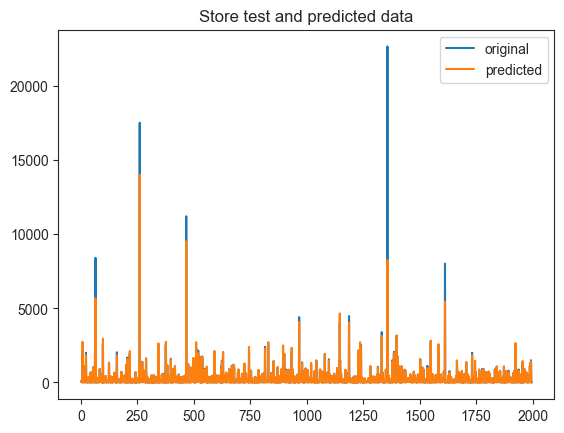

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgb_predict, label="predicted")
plt.title("Store test and predicted data")
plt.legend()
plt.show()

#### Pipeline

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression


In [ ]:
# pipe = Pipeline(steps=[
#     ('classifier', RandomForestClassifier())
# ])

# logistic_params = {
#     'classifier': [LogisticRegression()],
#     'classifier__penalty': ['l1', 'l2']
# }

# random_forest_params = {
#     'classifier': [RandomForestClassifier()],
#     'classifier__max_features': [1,2,3]
# }


# search_space = [
#     logistic_params,
#     random_forest_params,
    
# ]

In [ ]:
# modelv0 = GridSearchCV(estimator = pipe,
#                   param_grid = search_space,
#                   cv = 10)

In [ ]:
# X = df[['Price', "Sales Forecast", "Profit", "Quantity"]]
# y = df['Sales']

# X_train, X_test, y_train, y_test = train_test_split(
#                                         X,
#                                         y,
#                                         test_size   = 0.2,
#                                         random_state = 42)

In [ ]:
# modelv0.fit(X_train, y_train)

In [ ]:
# modelv0.predict(X)

In [ ]:
# modelv0.score(X,y)

Import Test

In [ ]:
# import pickle

# with open('my_model', 'wb') as archivo_salida:
#     pickle.dump(modelv0.best_estimator_, archivo_salida)

In [ ]:
# with open('my_model', 'rb') as archivo_entrada:
#     loaded_model = pickle.load(archivo_entrada)

# loaded_model = pickle.load(open('my_model', 'rb'))

In [ ]:
# loaded_model.score(X_test,y_test)

In [ ]:
# X_test['target'] = y_test
# X_test.head()

In [ ]:
#X_test.to_csv('test.csv')